<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/5_1_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_CNN(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 컨볼루션 신경망(CNN): 교재 131p~

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## 데이터 가져오기
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(np.max(x_train[0]), np.min(x_train[0]))

(60000, 28, 28)
255 0


In [6]:
# 데이터 정규화(0 ~ 1)
train_x = x_train/255.0
test_x =  x_test/255.0

In [10]:
# 컨볼류션 신경망(Conv2D 레이어) 연산을 수행하기 위해서는 채널(흑백 1, RGB 3)을 추가해야 함
print(x_train.shape, x_test.shape)

x_train =x_train.reshape(-1, 28, 28, 1)   # x_train.reshape(그림수자동설정, 세로28, 가로28, 픽셀표현 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
x_train.ndim

4

In [13]:
# 정답(타켓) 레이블링
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
train_y = keras.utils.to_categorical(y_train)
test_y = to_categorical(y_test)

train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
# 훈련/검증데이터셋을 7:3 비율로 분리
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                  test_size=0.3, 
                                                  random_state=123)

In [17]:
# 모델 구성하기
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model=models.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, padding='same', 
                  activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), 
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), 
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

In [18]:
# 모델 학습하기
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [22]:
# 컨볼루선 신경망 학습
hist = model.fit(train_x, train_y,
                 epochs=30, 
                 batch_size=32,
                 validation_data=(val_x,val_y))

Epoch 1/30
1313/1313 [==============================] - 44s 33ms/step - loss: 0.5193 - acc: 0.8094 - val_loss: 0.3624 - val_acc: 0.8714
Epoch 2/30
1313/1313 [==============================] - 42s 32ms/step - loss: 0.3327 - acc: 0.8782 - val_loss: 0.3204 - val_acc: 0.8881
Epoch 3/30
1313/1313 [==============================] - 43s 33ms/step - loss: 0.2827 - acc: 0.8965 - val_loss: 0.2871 - val_acc: 0.8962
Epoch 4/30
1313/1313 [==============================] - 44s 33ms/step - loss: 0.2504 - acc: 0.9071 - val_loss: 0.2830 - val_acc: 0.8989
Epoch 5/30
1313/1313 [==============================] - 44s 34ms/step - loss: 0.2263 - acc: 0.9140 - val_loss: 0.2628 - val_acc: 0.9071
Epoch 6/30
1313/1313 [==============================] - 45s 34ms/step - loss: 0.2035 - acc: 0.9243 - val_loss: 0.2674 - val_acc: 0.9066
Epoch 7/30
1313/1313 [==============================] - 45s 34ms/step - loss: 0.1847 - acc: 0.9300 - val_loss: 0.2757 - val_acc: 0.9051
Epoch 8/30
1313/1313 [==========================

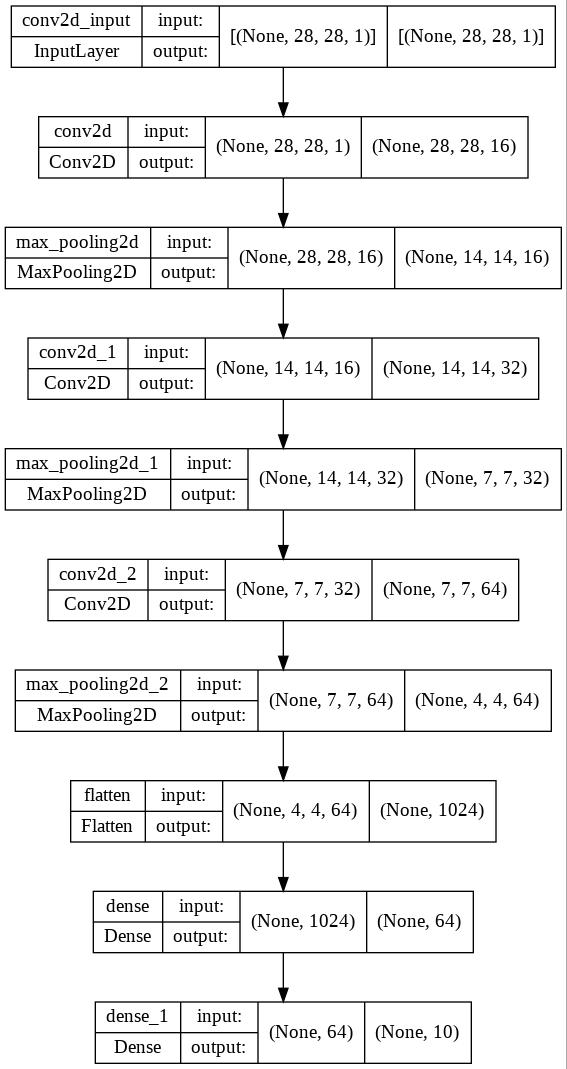

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,"model.jpg",show_shapes="snow")